<a href="https://colab.research.google.com/github/ManjotKaur-27/BeatBot-AI-Project/blob/main/BeatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd #Import all libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')
import os

# Check what files are available in /content/
print("Files in /content/ directory:")
for file in os.listdir('/content/'):
    print(f"  {file}")

print("\n" + "="*50)

# Check what's in your Google Drive
print("Files in Google Drive root:")
try:
    for file in os.listdir('/content/drive/MyDrive/'):
        print(f"  {file}")
except:
    print("Could not access Google Drive")

print("\n" + "="*50)

# Look for CSV files specifically
print("Looking for CSV files...")
def find_csv_files(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                print(f"Found CSV: {os.path.join(root, file)}")

find_csv_files('/content/')
if os.path.exists('/content/drive/MyDrive/'):
    find_csv_files('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in /content/ directory:
  .config
  drive
  sample_data

Files in Google Drive root:
  pics
  school projects
  Educational
  college id.jpg
  Basics of Mechanical Designing.gdoc
  Saved from Chrome
  adhaar.jpg
  passport pic.jpg
  Colab Notebooks
  processed_music_data.csv

Looking for CSV files...
Found CSV: /content/drive/MyDrive/processed_music_data.csv
Found CSV: /content/drive/MyDrive/Colab Notebooks/SpotifySongs.csv
Found CSV: /content/sample_data/california_housing_train.csv
Found CSV: /content/sample_data/mnist_train_small.csv
Found CSV: /content/sample_data/california_housing_test.csv
Found CSV: /content/sample_data/mnist_test.csv
Found CSV: /content/drive/MyDrive/processed_music_data.csv
Found CSV: /content/drive/MyDrive/Colab Notebooks/SpotifySongs.csv


In [19]:
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')
#Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpotifySongs.csv', encoding='latin-1')
print(f"Dataset loaded! Shape: {data.shape}")
#THEN save the processed data
data.to_csv('/content/drive/MyDrive/processed_music_data.csv', index=False)
print("Data saved successfully!")
# Clean and assign back to data (drop duplicates)
data = data.drop_duplicates(subset=['ArtistName', 'SongName'], keep='first')
print(f"Cleaned dataset shape: {data.shape}")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded! Shape: (3731, 15)
Data saved successfully!
Cleaned dataset shape: (1084, 15)


,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
1,Falling,Trevor Daniel,84,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382
2,Shayad,Pritam,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,Genda Phool (feat. Payal Dev),Badshah,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084 entries, 0 to 3717
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongName          1084 non-null   object 
 1   ArtistName        1084 non-null   object 
 2   Popularity        1084 non-null   int64  
 3   Danceability      1084 non-null   float64
 4   Energy            1084 non-null   float64
 5   Key               1084 non-null   int64  
 6   Loudness          1084 non-null   float64
 7   Mode              1084 non-null   int64  
 8   Speechiness       1084 non-null   float64
 9   Acousticness      1084 non-null   float64
 10  Instrumentalness  1084 non-null   float64
 11  Liveness          1084 non-null   float64
 12  Valence           1084 non-null   float64
 13  Tempo             1084 non-null   float64
 14  Duration_ms       1084 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 135.5+ KB


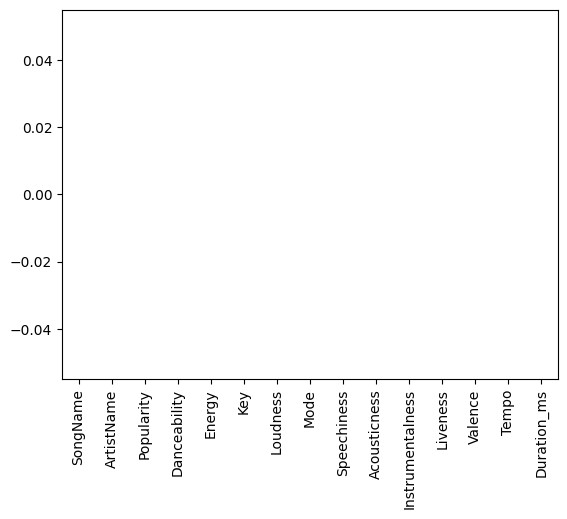

In [21]:
#To check null values count
data.isnull().sum()
data.isnull().sum().plot.bar()
plt.show()

In [22]:
#To drop the column named Mode and key because it is not needed: Drop method
data = data.drop(['Mode','Key'],axis=1)

In [23]:
#Float datatype columns
floats = []
for col in data.columns:
  if data[col].dtype == 'float':
    floats.append(col)

len(floats)

9

<ipython-input-24-d576f8f426f8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-24-d576f8f426f8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-24-d576f8f426f8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

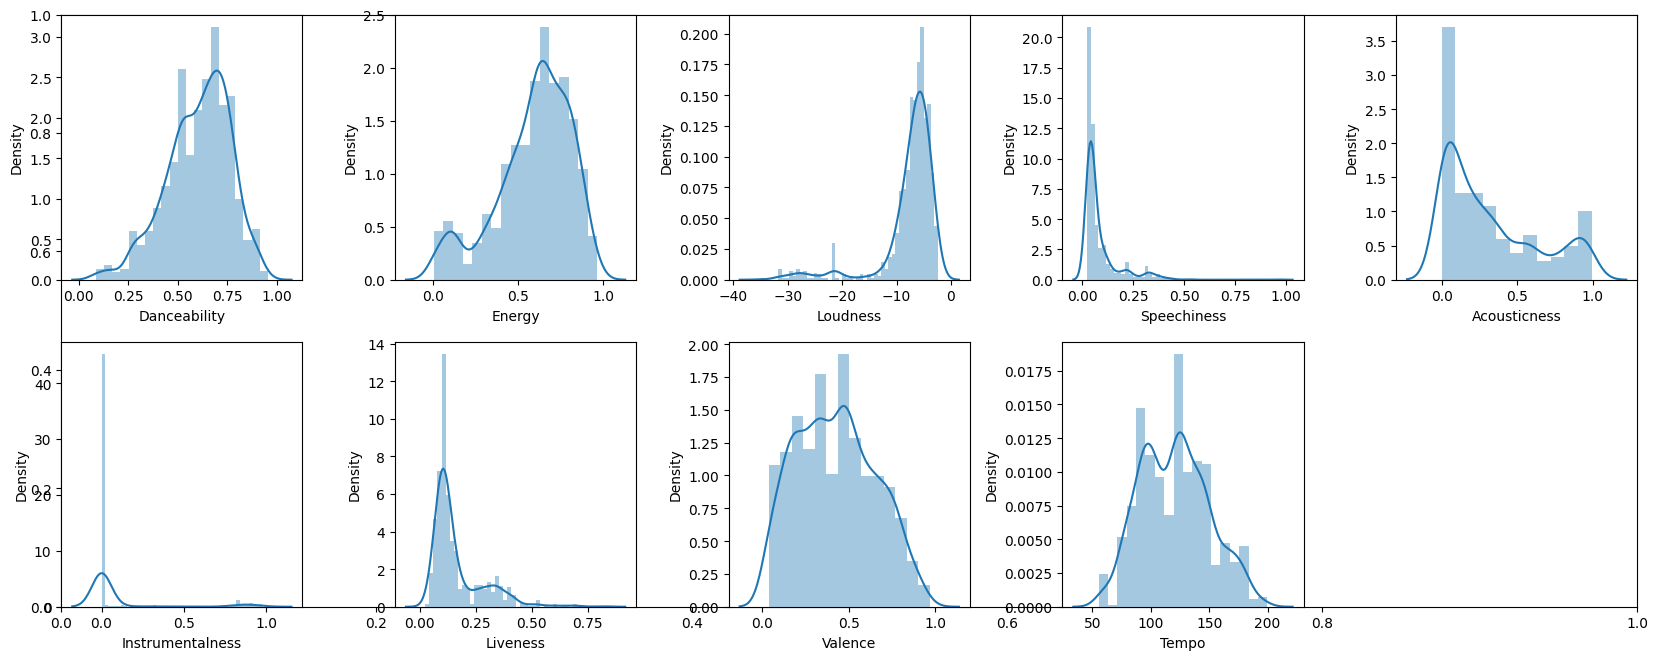

In [24]:
#Graph to show float datatype columns
plt.subplots(figsize=(17,7))
for i,col in enumerate(floats):
  plt.subplot(2,5,i+1)
  sns.distplot(data[col])
plt.tight_layout()
plt.show()

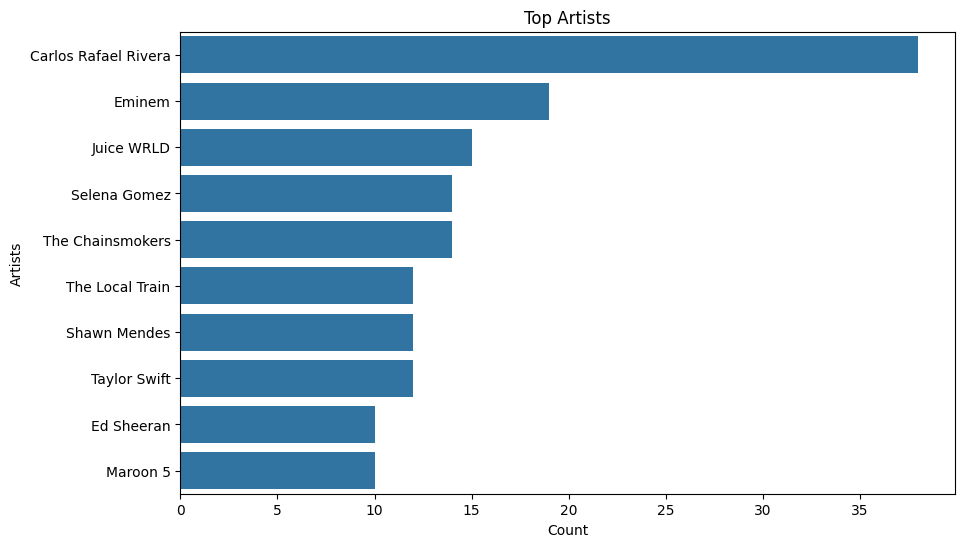

In [25]:
#Top Artists (ArtistName)
plt.figure(figsize=(10, 6))
sns.countplot(y='ArtistName', data=data, order=data['ArtistName'].value_counts().index[:10])
plt.title('Top Artists')
plt.xlabel('Count')
plt.ylabel('Artists')
plt.show()

<ipython-input-26-12b7c57893bb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SongName', x='Popularity', data=top_songs, palette='viridis')


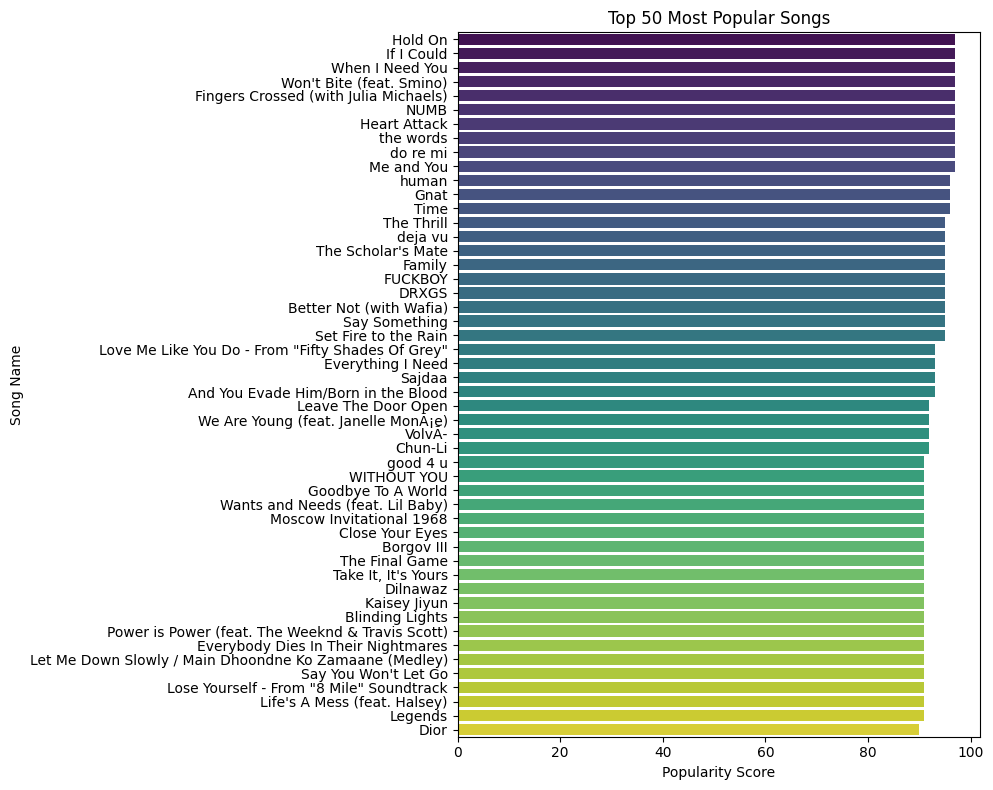

In [26]:
#Top Popular Songs (Popularity)
top_songs = data.nlargest(50, 'Popularity')
plt.figure(figsize=(10, 8))

# Create horizontal bar plot
sns.barplot(y='SongName', x='Popularity', data=top_songs, palette='viridis')

plt.title('Top 50 Most Popular Songs')
plt.xlabel('Popularity Score')
plt.ylabel('Song Name')

plt.tight_layout()
plt.show()

<ipython-input-27-159552b14b2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='SongName', x='Danceability', data=top_songs, palette='viridis')


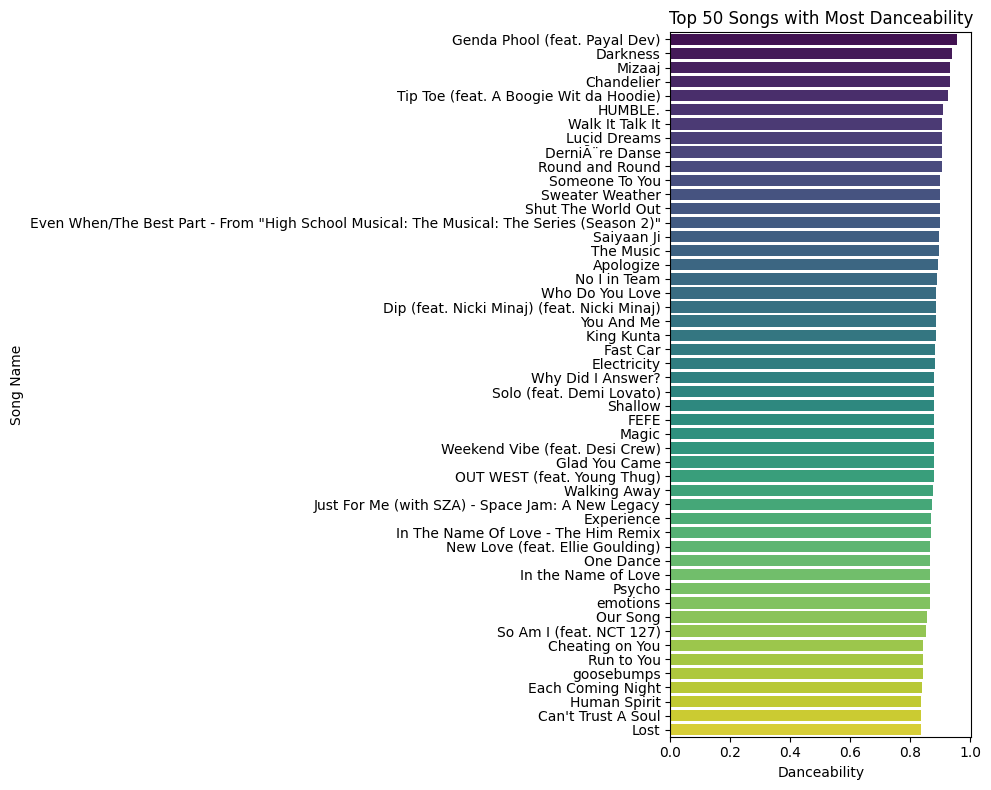

In [27]:
#Top Danceability
top_songs = data.nlargest(50, 'Danceability')
plt.figure(figsize=(10, 8))

# Create horizontal bar plot
sns.barplot(y='SongName', x='Danceability', data=top_songs, palette='viridis')

plt.title('Top 50 Songs with Most Danceability')
plt.xlabel('Danceability')
plt.ylabel('Song Name')

plt.tight_layout()
plt.show()

In [28]:
#Combining all these features into one variable
data['combined_features'] = (
    data['ArtistName'].fillna('') + ' ' +
    data['Popularity'].astype(str) + ' ' +
    data['Danceability'].astype(str) + ' ' +
    data['SongName'].fillna('')

)

In [29]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])
song_vectorizer = CountVectorizer()
song_vectorizer.fit(data['combined_features'])

CountVectorizer()

In [30]:
data = data.sort_values(by=['Popularity'],ascending=False).head(10000)

In [31]:
def get_similarities(song_name, track):

#Getting vector for the input song
  text_array1 = song_vectorizer.transform(track[track['SongName']==song_name]['ArtistName']).toarray()
  num_array1 = track[track['SongName']==song_name].select_dtypes(include=np.number).to_numpy()

#Store similarity for each row of the dataset
  sim = []
  for idx, row in track.iterrows():
    name = row['SongName']

#Getting vector for current song
    text_array2 = song_vectorizer.transform(track[track['SongName']==name]['ArtistName']).toarray()
    num_array2 = track[track['SongName']==name].select_dtypes(include=np.number).to_numpy()

#Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1,text_array2)[0][0]
    num_sim = cosine_similarity(num_array1,num_array2)[0][0]
    sim.append(text_sim + num_sim)

  return sim

In [32]:
def recommended_songs(song_name,track=data):

#Base case
  if data[data['SongName'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid name.\n Some songs you may like:\n')

    for song in data.sample(n=5)['SongName'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name,data)

  data.sort_values(by=['similarity_factor','Popularity'],
                   ascending = [False, False],
                   inplace=True)

#First song will be input song itself as the similarity will be highest
  display(data[['SongName','ArtistName']][2:7])

In [33]:
recommended_songs('goosebumps')

,SongName,ArtistName
3175,Old Friends,Scott Helman
1531,All Too Well,Jake Scott
1081,Rewrite The Stars (with James Arthur & Anne-Ma...,James Arthur
1235,Ode To My Family,The Cranberries
1942,All My Friends,AJ Mitchell


In [34]:
recommended_songs('good 4 u')

,SongName,ArtistName
1394,"Even When/The Best Part - From ""High School Mu...",Olivia Rodrigo
1422,"The Rose Song - From ""High School Musical: The...",Olivia Rodrigo
1408,drivers license,Olivia Rodrigo
2512,traitor,Olivia Rodrigo
2386,Say You Won't Let Go,James Arthur


In [35]:
recommended_songs('Levitating (feat. DaBaby)')

,SongName,ArtistName
1409,Don't Start Now,Dua Lipa
2216,We're Good,Dua Lipa
1037,Break My Heart,Dua Lipa
1747,New Rules,Dua Lipa
252,Love Again,Dua Lipa


In [36]:
recommended_songs('Butter')

,SongName,ArtistName
2302,Friendly Neighborhood Poltergeist,Rory Webley
2211,VIBEZ,DaBaby
2455,Wolves,Selena Gomez
3245,XO Tour Llif3,Lil Uzi Vert
2829,I Want You To Know,Zedd
